In [1]:
from quantum_gates.quantum_algorithms import (
    hadamard_reverse_qft_circ,
    ghz_circ,
    qft_circ,
    qaoa_circ,
)


$\textbf{
Generates the Qiskit circuit applying Hadamard gates on all qubits and the inverse Quantum Fourier transform.\\}$

A useful property of the circuit is that it maps the all 0 state to the equal superposition of all states, 

and back to the 0 state. As we know the ideal result, we can calculate fidelity metrics easily.

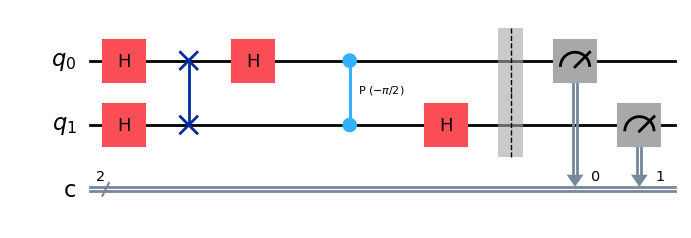

In [3]:
nqubit=2 
circuit=hadamard_reverse_qft_circ(n_qubits=2)
circuit.draw("mpl")

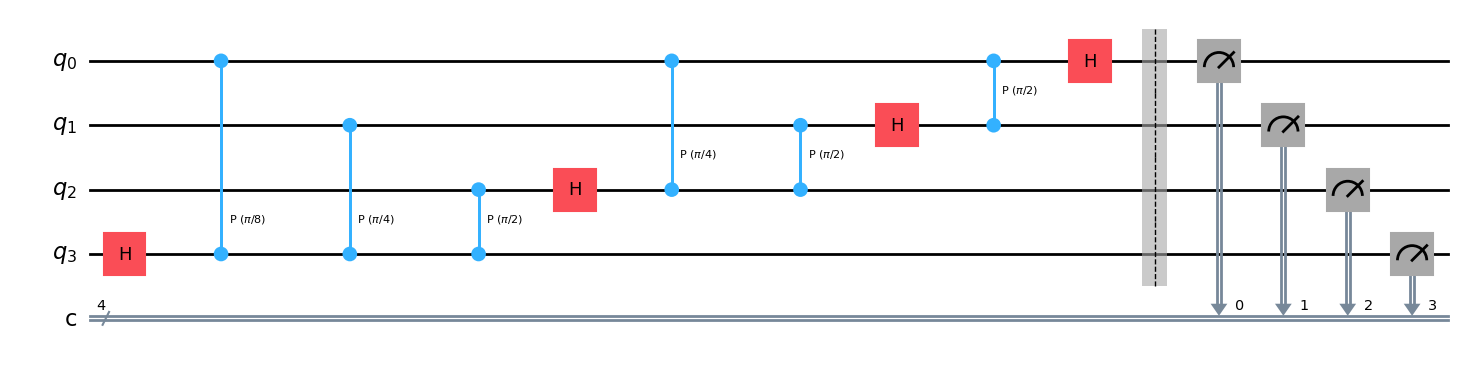

In [4]:
qft=qft_circ(n_qubits=4)
qft.draw(output="mpl")

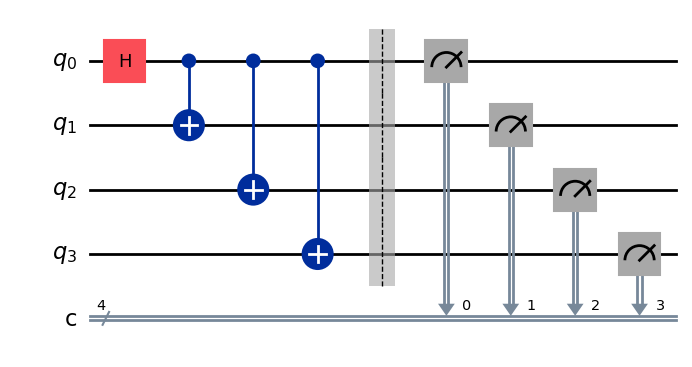

In [5]:
ghz=ghz_circ(n_qubits=4)
ghz.draw(output="mpl")

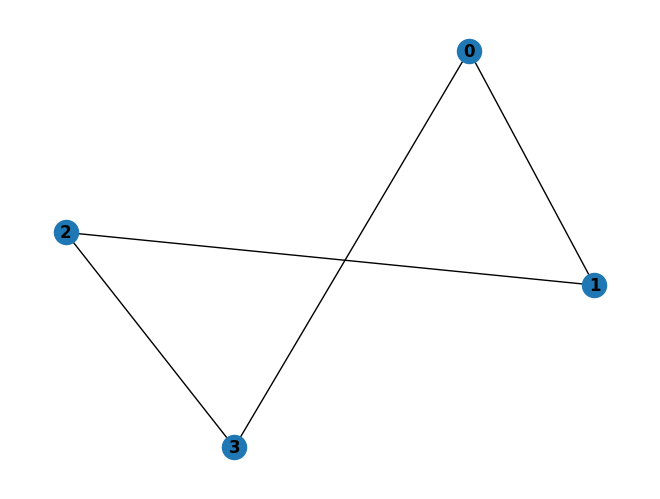

In [32]:
import networkx as nx 
G=nx.Graph()

G.add_node(1) 
G.add_nodes_from([2])
'''
H=nx.path_graph(10)
G.add_nodes_from(H)
'''
for i in range (0,3):
    G.add_edge(i,i+1)
G.add_edge(2,1)
G.add_edge(0,3)
nx.draw(G,with_labels=True,font_weight="bold")

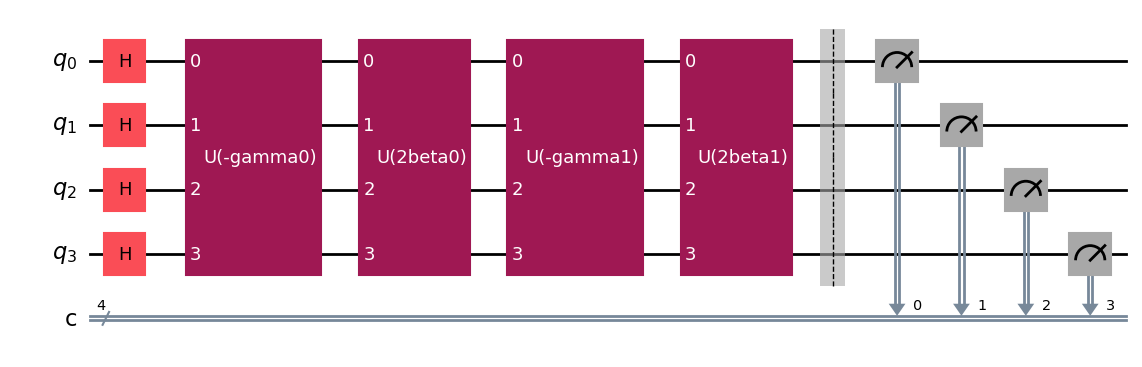

In [33]:
qaoa=qaoa_circ(G,theta=[i for i in range (5)])
qaoa.draw(output="mpl")

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService 
from qiskit_ibm_runtime import SamplerV2 as Sampler 
service=QiskitRuntimeService()

backend=service.least_busy(operational=True)
print(backend.name)

ibm_brisbane


In [42]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 

passmanager=generate_preset_pass_manager(optimization_level=3,backend=backend)

isa_qaoa=passmanager.run(qaoa)

print("Displaying Circuit Details:\n")
print(*[f"{i}={j}" for i,j in isa_qaoa.count_ops().items()],sep="\n",end="\n\n")

print(f"Depth of the Circuit: {isa_qaoa.depth()}")

Displaying Circuit Details:

rz=1345
sx=838
ecr=347
x=41
measure=4
barrier=1

Depth of the Circuit: 1653


In [44]:
sampler=Sampler(mode=backend) 
pubs=sampler.run([isa_qaoa],shots=1024)
print(f"Job id: {pubs.job_id()}")


Job id: cw7aqzqbhxtg008wffng


In [3]:
from qiskit.circuit.library import IQP 

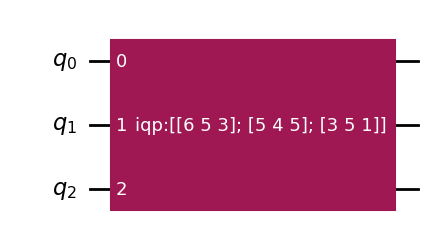

In [6]:
circ=IQP(interactions=[[6,5,3],[5,4,5],[3,5,1]])
circ.draw(output="mpl")

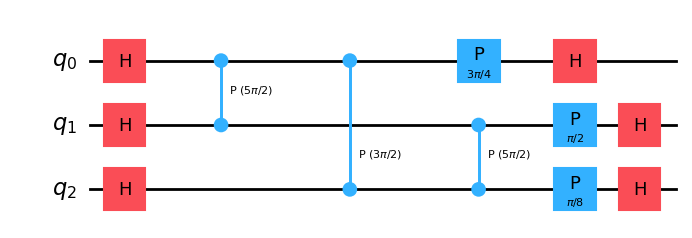

In [7]:
circ.decompose().draw(output="mpl")

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from numpy import pi

In [11]:
iris = datasets.load_iris()
data = iris.data[:, 2]  # Petal length

# Normalize the data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

print("Normalized Data:", normalized_data)

Normalized Data: [0.06779661 0.06779661 0.05084746 0.08474576 0.06779661 0.11864407
 0.06779661 0.08474576 0.06779661 0.08474576 0.08474576 0.10169492
 0.06779661 0.01694915 0.03389831 0.08474576 0.05084746 0.06779661
 0.11864407 0.08474576 0.11864407 0.08474576 0.         0.11864407
 0.15254237 0.10169492 0.10169492 0.08474576 0.06779661 0.10169492
 0.10169492 0.08474576 0.08474576 0.06779661 0.08474576 0.03389831
 0.05084746 0.06779661 0.05084746 0.08474576 0.05084746 0.05084746
 0.05084746 0.10169492 0.15254237 0.06779661 0.10169492 0.06779661
 0.08474576 0.06779661 0.62711864 0.59322034 0.66101695 0.50847458
 0.61016949 0.59322034 0.62711864 0.38983051 0.61016949 0.49152542
 0.42372881 0.54237288 0.50847458 0.62711864 0.44067797 0.57627119
 0.59322034 0.52542373 0.59322034 0.49152542 0.6440678  0.50847458
 0.66101695 0.62711864 0.55932203 0.57627119 0.6440678  0.6779661
 0.59322034 0.42372881 0.47457627 0.45762712 0.49152542 0.69491525
 0.59322034 0.59322034 0.62711864 0.57627119 0

In [12]:
def iqp_encoding_all_data(data_points):
    n_qubits = len(data_points)
    qc = QuantumCircuit(n_qubits)
    
    # Step 1: Apply Hadamard gates to all qubits
    qc.h(range(n_qubits))
    
    # Step 2: Apply RZ phase rotations based on data points
    for i in range(n_qubits):
        qc.rz(2 * pi * data_points[i], i)
    
    # Step 3: Apply Controlled-Z gates between every pair of qubits
    for i in range(n_qubits):
        for j in range(i + 1, n_qubits):
            qc.cz(i, j)
    
    # Step 4: Apply Hadamard gates again to all qubits
    qc.h(range(n_qubits))
    
    return qc

In [31]:
import matplotlib.pyplot as plt

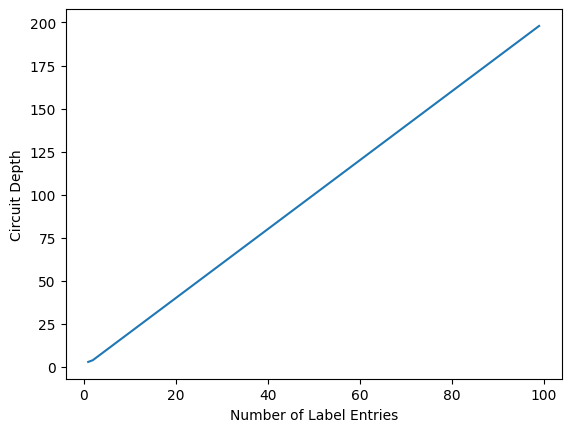

In [34]:
def plot_depth():
    num_points=1
    Dict={}
    for i in range (1,100):
      selected=normalized_data[:i]
      encoded_circ=iqp_encoding_all_data(selected)
      Dict[i]=encoded_circ.depth()
    return Dict
Dict=plot_depth()

plt.plot(Dict.keys(),Dict.values())
plt.xlabel("Number of Label Entries")
plt.ylabel("Circuit Depth")
plt.show()
    

IQP Encoding Circuit for All Data Points:


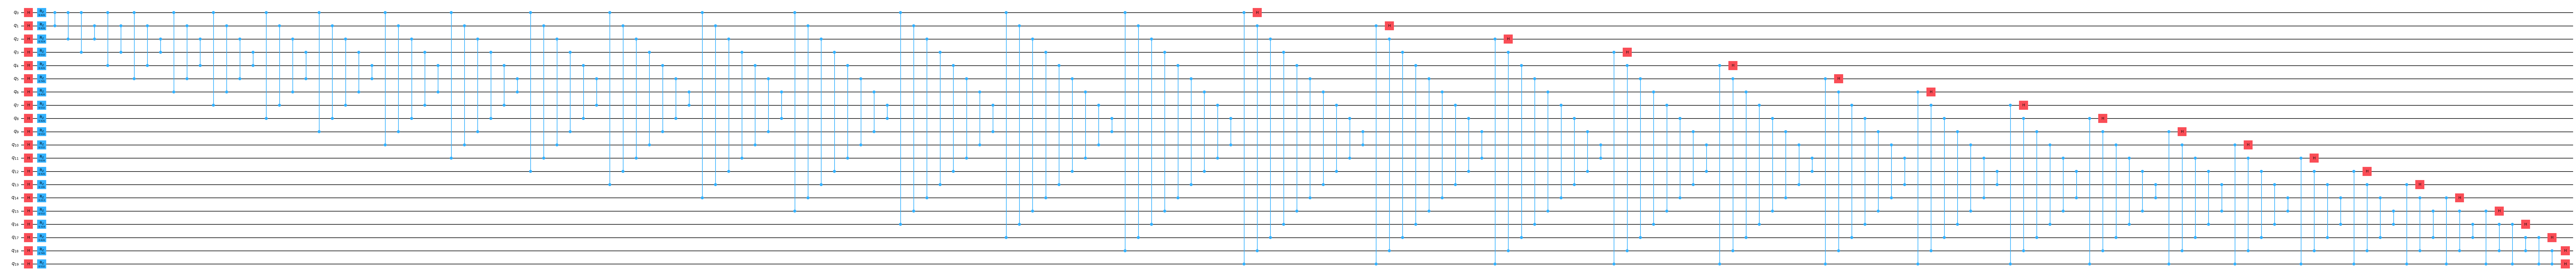

In [30]:
num_data_points = 20
selected_data = normalized_data[:num_data_points]

# Create the IQP encoding circuit for all selected data points
encoded_circuit = iqp_encoding_all_data(selected_data)

# Draw the circuit
print("IQP Encoding Circuit for All Data Points:")
encoded_circuit.draw("mpl",fold=-1)

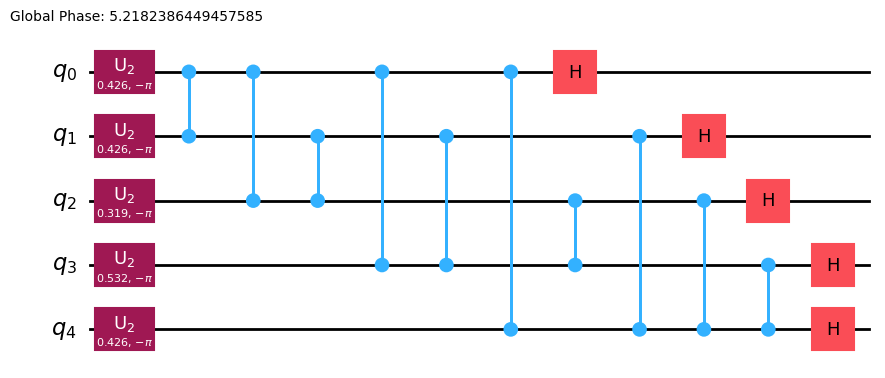

In [25]:
from qiskit import transpile
from qiskit_aer import StatevectorSimulator
backend=StatevectorSimulator()

pubs=transpile(encoded_circuit,backend)
pubs.draw("mpl")

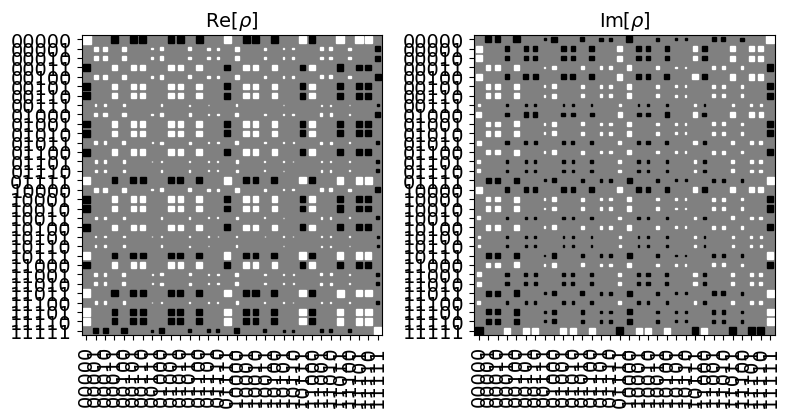

In [28]:
job=backend.run(pubs)
res=job.result()

sv=res.get_statevector()
sv.draw("hinton")

$\textbf{Angle Encoding}$

In [35]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [38]:
iris=datasets.load_iris()

data=iris.data[:,2]

scaler=MinMaxScaler(feature_range=(0,np.pi))
normalized_data=scaler.fit_transform(data.reshape(-1,1)).flatten()
print(f"Normalized Data: {normalized_data}")

Normalized Data: [0.21298933 0.21298933 0.159742   0.26623667 0.21298933 0.37273133
 0.21298933 0.26623667 0.21298933 0.26623667 0.26623667 0.319484
 0.21298933 0.05324733 0.10649467 0.26623667 0.159742   0.21298933
 0.37273133 0.26623667 0.37273133 0.26623667 0.         0.37273133
 0.479226   0.319484   0.319484   0.26623667 0.21298933 0.319484
 0.319484   0.26623667 0.26623667 0.21298933 0.26623667 0.10649467
 0.159742   0.21298933 0.159742   0.26623667 0.159742   0.159742
 0.159742   0.319484   0.479226   0.21298933 0.319484   0.21298933
 0.26623667 0.21298933 1.97015133 1.86365666 2.07664599 1.59741999
 1.91690399 1.86365666 1.97015133 1.22468866 1.91690399 1.54417266
 1.33118333 1.70391466 1.59741999 1.97015133 1.38443066 1.81040933
 1.86365666 1.65066733 1.86365666 1.54417266 2.02339866 1.59741999
 2.07664599 1.97015133 1.75716199 1.81040933 2.02339866 2.12989332
 1.86365666 1.33118333 1.49092533 1.43767799 1.54417266 2.18314066
 1.86365666 1.86365666 1.97015133 1.81040933 1.6506

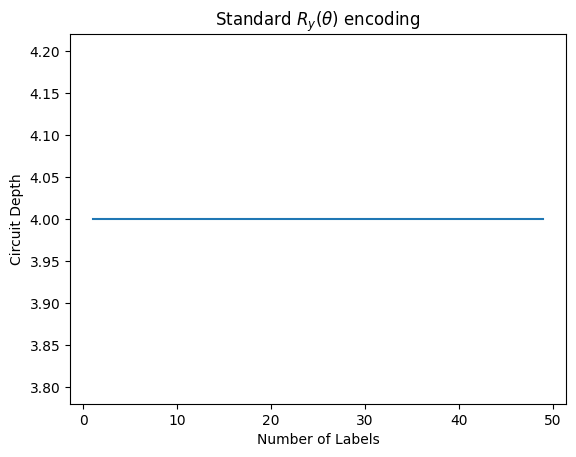

In [84]:
def plot_depth_angle(data):
    Dict={}
    for i in range(1,50):
        selected=data[:i]
        circ=angle_encoding(selected)
        isa_circ=pm.run(circ)
        Dict[i]=isa_circ.depth()
    return Dict
def angle_encoding(data_points):
    n_qubits=len(data_points) 
    qc=QuantumCircuit(n_qubits)

    for i in range (n_qubits):
        qc.ry(data_points[i],i) 
    return qc
Dict_angle=plot_depth_angle(normalized_data)

plt.plot(Dict_angle.keys(),Dict_angle.values())
plt.title(r"Standard $R_{y}(\theta)$ encoding")
plt.xlabel("Number of Labels")
plt.ylabel("Circuit Depth")
plt.show()

**Arbitrary Encoding Standard using EfficientSU2**

In [59]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 
backend=service.least_busy(operational=True)
pm=generate_preset_pass_manager(backend=backend,optimization_level=3)



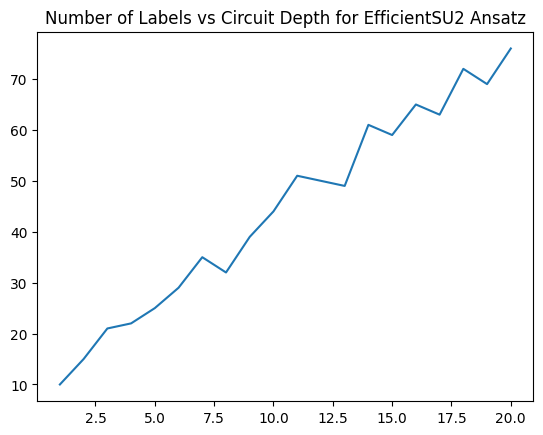

In [81]:
from qiskit.circuit.library import EfficientSU2,ZZFeatureMap
def Arbitrary_Encoding(n):
    circuit=EfficientSU2(num_qubits=n,
                         reps=1,
                         insert_barriers=True)
    return circuit

def plot_arbitrary():
    Dict={}
    for i in range(1,21):
        circ=Arbitrary_Encoding(i)
        isa_circ=pm.run(circ)
        Dict[i]=isa_circ.depth()
    return Dict
Dict_SU2=plot_arbitrary()
plt.title("Number of Labels vs Circuit Depth for EfficientSU2 Ansatz")
plt.plot(Dict_SU2.keys(),Dict_SU2.values())
plt.show()
        

In [62]:
print(Dict)

{1: 10, 2: 15, 3: 21, 4: 22, 5: 25}


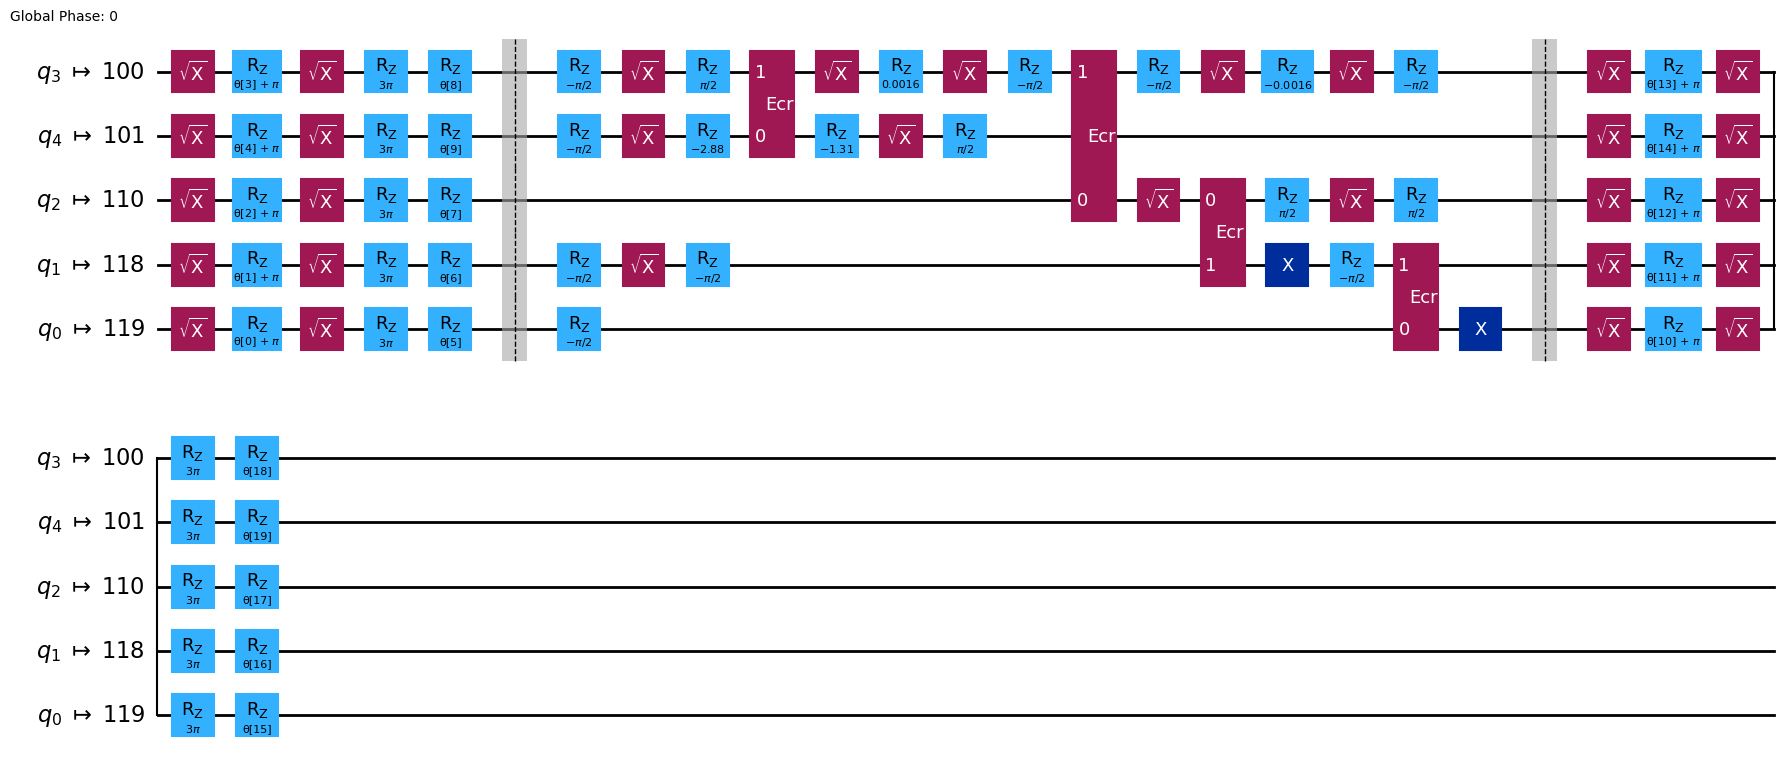

In [63]:
qc=Arbitrary_Encoding(5)
isa_qc=pm.run(qc)
isa_qc.draw(output="mpl",idle_wires=False)

In [65]:
print(isa_qc.num_parameters)

20


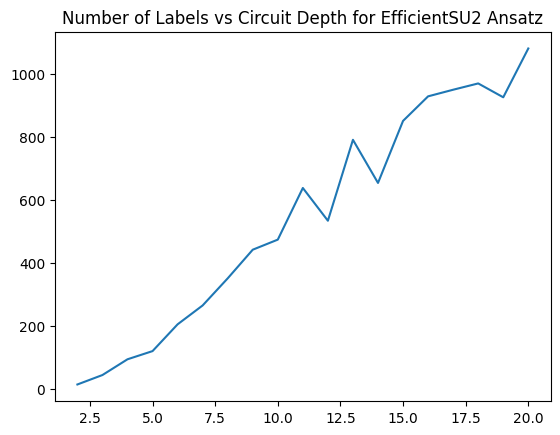

In [80]:
from qiskit.circuit.library import ZZFeatureMap
def Arbitrary_Encoding(n):
    circuit=ZZFeatureMap(n,
                         reps=1,
                         insert_barriers=True)
    return circuit

def plot_arbitrary():
    Dict={}
    for i in range(2,21):
        circ=Arbitrary_Encoding(i)
        isa_circ=pm.run(circ)
        Dict[i]=isa_circ.depth()
    return Dict
Dict_ZZ=plot_arbitrary()
plt.title("Number of Labels vs Circuit Depth for EfficientSU2 Ansatz")
plt.plot(Dict_ZZ.keys(),Dict_ZZ.values())
plt.show()

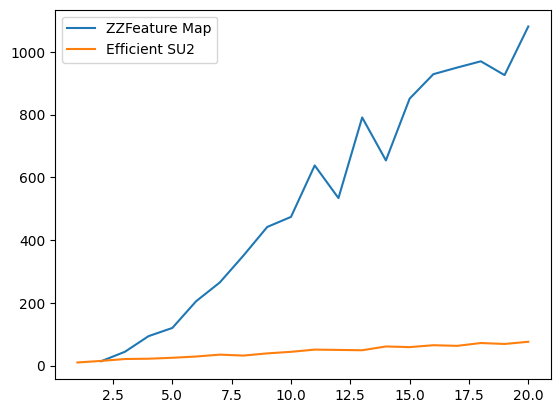

In [82]:
plt.plot(Dict_ZZ.keys(),Dict_ZZ.values(),label="ZZFeature Map")
plt.plot(Dict_SU2.keys(),Dict_SU2.values(),label="Efficient SU2")
plt.legend()
plt.show()